This jupyter notebook contains the data analysis code used for my medium blogpost.

<b>Contents</b>

[Data Wrangling](#DataWrangling)

[Data Analysis](#DataAnalysis)
- [Gender](#Gender)
 - Figure 2. The (lack of) change in gender representation between the years 2017– 2021. 
- [Race](#Race)
 - Figure 3. The change in the representation of ethnicities between the years 2017– 2021.
- [Popular Programming Languages](#PopularProgrammingLanguages)
 - Figure 1. The most popular programming languages in the years 2017– 2021.
 - Table 1. Top 10 most popular programming languages Figure 1; years 2017 and 2021.

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

## Convenience functions

In [2]:
import inspect
def retrieve_name(var):
    '''Retrieves the name of a variable'''
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [3]:
from collections import defaultdict
def total_count(df, col1, col2, look_for):
    '''
    OUTPUT:
    new_df - a dataframe of each "look_for" with the count of how often it appears 
    
    INPUT:
    df - pandas dataframe
    col1 - column name to look through
    col2 - column to count values from
    look_for - a list of strings to search for in each row of df[col]

    This is a modified function from that provided in udacity data science nanodegree
    '''
    new_df = defaultdict(int)

    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the val is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [4]:
def get_possible_values(df, column_name, verbose = False):
    '''Returns set of all the distinct values in a pandas column'''
    all_values = df[column_name].values.tolist()
    all_values = [x for x in all_values if str(x) != 'nan'] # Ensures nan values are handled correctly
    list_of_lists = []
    for a_value in all_values:
        #list_of_lists.append([s.strip() for s in a_value.replace(',', ';').split(';')]) # Uncomment to treat semicolon as separator
        list_of_lists.append([s.strip() for s in a_value.split(';')])
    flat_list = [item for sublist in list_of_lists for item in sublist]
    if verbose: print(set(flat_list))
    return set(flat_list)

In [5]:
def clean_and_plot(df, column_name, possible_values, title='', plot=True):
    '''
    OUTPUT
    props_study_df - a dataframe with the proportion of counts for values in the column_name column.
    Displays a plot of the proportion of counts for values in the column_name column.
        
    INPUT 
    df - a dataframe holding the column of interest
    possible_values - set of all the possible values in column of interest
    
    This is a modified function from that provided in udacity data science nanodegree
    '''
    
    study = df[column_name].value_counts().reset_index()
    study.rename(columns={'index': column_name, column_name: 'count'}, inplace=True)
    study_df = total_count(study, column_name, 'count', possible_values)

    study_df.set_index(column_name, inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None, figsize = ((10,5)));
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

In [6]:
loc = "G:\\My Drive\\udacity\\nd025-nanodegree-data-science\\PROJECTS_FOR_SUBMISSION\\Project1-Write_A_Data_Science_Blog_Post\\data\\" # Insert location here

<a name="DataWrangling"></a>

# Data Wrangling

In [7]:
# Load in data
all_data = []
all_schema = []
for i in range(2017,2022,1):
    all_data.append(pd.read_csv(loc+str(i)+'survey_results_public.csv', dtype=object))
    all_schema.append(pd.read_csv(loc+str(i)+'survey_results_schema.csv'))

In [8]:
# The original data can be found here: https://insights.stackoverflow.com/survey

In [9]:
# Give data human readable aliases 
df2017 = all_data[0]
df2018 = all_data[1]
df2019 = all_data[2]
df2020 = all_data[3]
df2021 = all_data[4]

In [10]:
# Print out the shapes of all the dataframes
for dataframe in all_data:
    print(retrieve_name(dataframe)[0], dataframe.shape)

df2017 (51392, 154)
df2018 (98855, 129)
df2019 (88883, 85)
df2020 (64461, 61)
df2021 (83439, 48)


As we will not be performing any machine learning, nor creating any inferential statistics, we shall use this function to drop the rows containing null values:

In [11]:
def drop_empty_rows(df):
    print("From " + str(df.shape[0]) +" rows ", end = '')
    print( df.isnull().any(axis=1).sum(), end = '') 
    print( " rows containing null values were dropped" , end = '')
    df = df.dropna() 
    print( ", leaving " + str(df.shape[0]) +" rows.")
    return df

However as we will be analysing Gender, Race and Popular Programming Languages separately, it makes sense *not* to remove until we subset the data below.

<a name="DataAnalysis"></a>
# Data Analysis

<a name="Gender"></a>
# Gender

In [12]:
# Subset the data to only the columns we are analysing
df2017 = all_data[0][['Gender']]
df2018 = all_data[1][['Gender']]
df2019 = all_data[2][['Gender']]
df2020 = all_data[3][['Gender']]
df2021 = all_data[4][['Gender']]

In [13]:
# Remove missing values
df2017 = drop_empty_rows(df2017)
df2018 = drop_empty_rows(df2018)
df2019 = drop_empty_rows(df2019)
df2020 = drop_empty_rows(df2020)
df2021 = drop_empty_rows(df2021)

From 51392 rows 16345 rows containing null values were dropped, leaving 35047 rows.
From 98855 rows 34386 rows containing null values were dropped, leaving 64469 rows.
From 88883 rows 3477 rows containing null values were dropped, leaving 85406 rows.
From 64461 rows 13904 rows containing null values were dropped, leaving 50557 rows.
From 83439 rows 1153 rows containing null values were dropped, leaving 82286 rows.


In some years, a large number of rows are dropped, but it must be kept in mind that a much larger number of rows remain.

Let us first look at how gender distributions change over time.

In [14]:
print(get_possible_values(df2017, 'Gender'))
print(get_possible_values(df2018, 'Gender'))
print(get_possible_values(df2019, 'Gender'))
print(get_possible_values(df2020, 'Gender'))
print(get_possible_values(df2021, 'Gender'))

{'Male', 'Other', 'Gender non-conforming', 'Transgender', 'Female'}
{'Male', 'Non-binary, genderqueer, or gender non-conforming', 'Female', 'Transgender'}
{'Non-binary, genderqueer, or gender non-conforming', 'Man', 'Woman'}
{'Non-binary, genderqueer, or gender non-conforming', 'Man', 'Woman'}
{'Woman', 'Non-binary, genderqueer, or gender non-conforming', 'Prefer not to say', 'Or, in your own words:', 'Man'}


To handle this categorical variable, we note that the possible values for this variable change each year. Only "Male" and "Female" remain the same (though in some years these are sometimes labelled "Man" and "Woman".)

For this reason, we will be combining every entry that is neither Male nor Female into the Other category, so that differences over the years can be noted.

### 2017

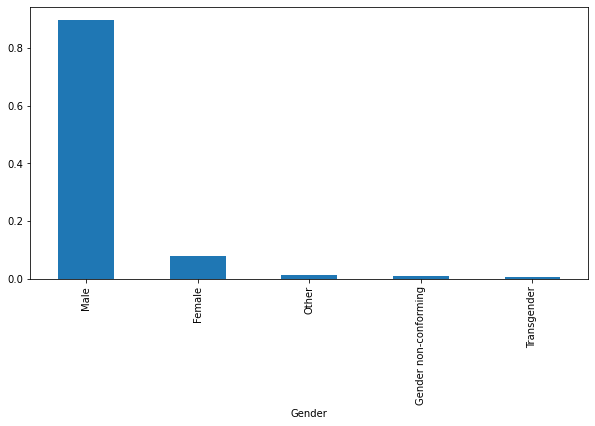

,count
Gender,
Female,0.077148
Male,0.896920
Other,0.025932


In [15]:
poss_gender_vals = get_possible_values(df2017, 'Gender')
props_df2017 = clean_and_plot(df2017, column_name = 'Gender', possible_values = poss_gender_vals)
#print(props_df2017.groupby(['Gender'], as_index=True).agg('sum'))
props_df2017.rename({'Transgender': 'Other', 'Non-binary': 'Other', 'Gender non-conforming': 'Other'}, inplace = True)
props_df2017 = props_df2017.groupby(['Gender'], as_index=True).agg('sum')
props_df2017

### 2018

{'Male', 'Non-binary, genderqueer, or gender non-conforming', 'Female', 'Transgender'}


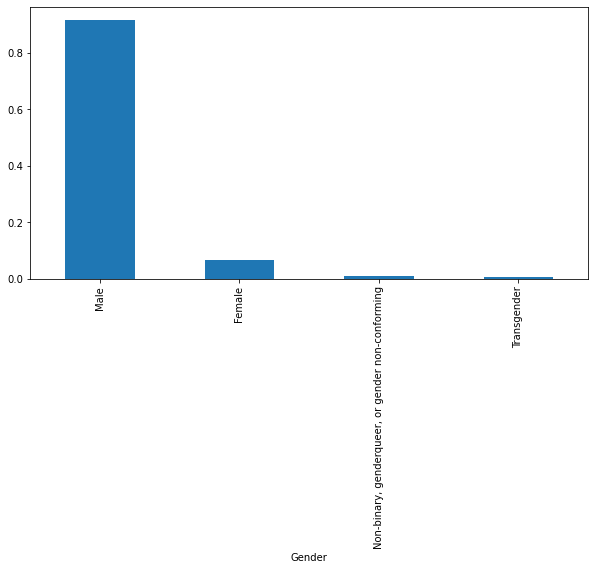

,count
Gender,
Female,0.067610
Male,0.916779
Other,0.015611


In [16]:
poss_gender_vals = get_possible_values(df2018, 'Gender', verbose = True)
props_df2018 = clean_and_plot(df2018, column_name = 'Gender', possible_values = poss_gender_vals)
props_df2018.rename({'Non-binary, genderqueer, or gender non-conforming': 'Other', 'Transgender': 'Other'}, inplace = True)
props_df2018 = props_df2018.groupby(['Gender'], as_index=True).agg('sum')
props_df2018

### 2019

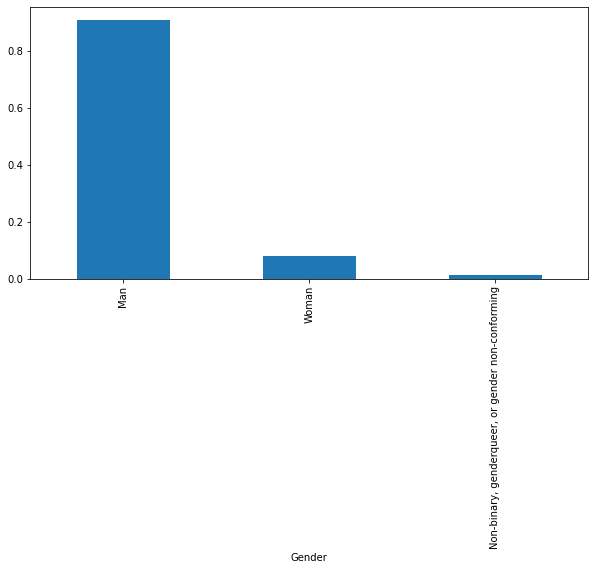

,count
Gender,
Female,0.077992
Male,0.910256
Other,0.011753


In [17]:
poss_gender_vals = get_possible_values(df2019, 'Gender')
props_df2019 = clean_and_plot(df2019, column_name = 'Gender', possible_values = poss_gender_vals)
props_df2019.rename({'Man': 'Male', 'Woman' : 'Female'}, inplace = True)
props_df2019.rename({'Non-binary, genderqueer, or gender non-conforming': 'Other'}, inplace = True)
props_df2019 = props_df2019.groupby(['Gender'], as_index=True).agg('sum')
props_df2019

### 2020

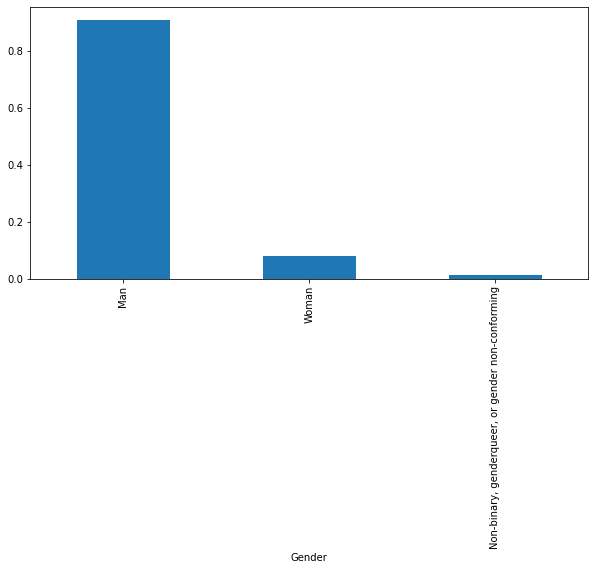

,count
Gender,
Female,0.079335
Male,0.908405
Other,0.012260


In [18]:
poss_gender_vals = get_possible_values(df2020, 'Gender')
props_df2020 = clean_and_plot(df2020, column_name = 'Gender', possible_values = poss_gender_vals)
props_df2020.rename({'Man': 'Male', 'Woman' : 'Female'}, inplace = True)
props_df2020.rename({'Non-binary, genderqueer, or gender non-conforming': 'Other'}, inplace = True)
props_df2020 = props_df2020.groupby(['Gender'], as_index=True).agg('sum')
props_df2020

### 2021

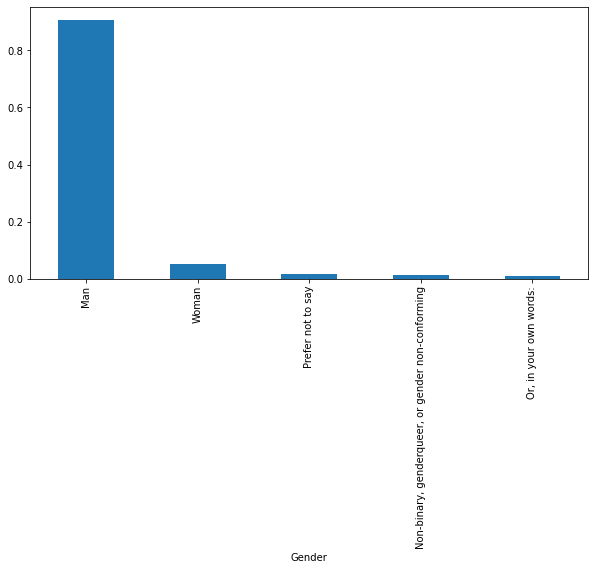

,count
Gender,
Female,0.052570
Male,0.906957
Other,0.040473


In [19]:
poss_gender_vals = get_possible_values(df2021, 'Gender')
props_df2021 = clean_and_plot(df2021, column_name = 'Gender', possible_values = poss_gender_vals)
props_df2021.rename({'Man': 'Male', 'Woman' : 'Female'}, inplace = True)
props_df2021.rename({'Non-binary, genderqueer, or gender non-conforming': 'Other', 
                     'Or, in your own words:': 'Other', 'Prefer not to say': 'Other'}
                    , inplace = True)
props_df2021 = props_df2021.groupby(['Gender'], as_index=True).agg('sum')
props_df2021

In [20]:
props_df2017.rename(columns={"count": "2017"}, inplace = True)
props_df2018.rename(columns={"count": "2018"}, inplace = True)
props_df2019.rename(columns={"count": "2019"}, inplace = True)
props_df2020.rename(columns={"count": "2020"}, inplace = True)
props_df2021.rename(columns={"count": "2021"}, inplace = True)

In [21]:
counts_df = props_df2017.join(props_df2018)
counts_df = counts_df.join(props_df2019)
counts_df = counts_df.join(props_df2020)
counts_df = counts_df.join(props_df2021)

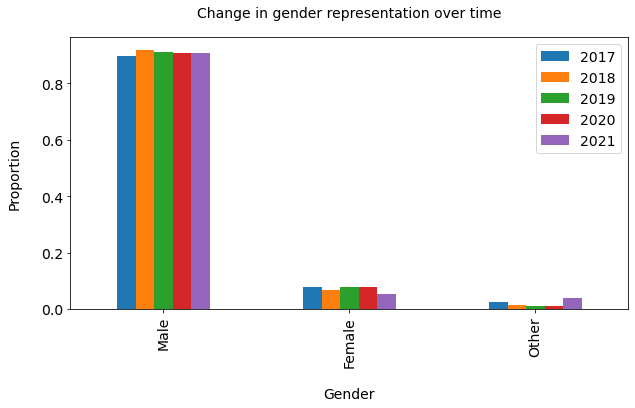

In [22]:
counts_df = counts_df.reindex(["Male", "Female", "Other"])
counts_df.plot(kind='bar', figsize = ((10,5)));
fontsize = 14
plt.legend(labels = [2017,2018,2019,2020,2021], fontsize = fontsize)
plt.xlabel('Gender', labelpad = 20, fontsize = fontsize)
plt.ylabel('Proportion', labelpad = 20, fontsize = fontsize)
plt.xticks(fontsize = fontsize); plt.yticks(fontsize = fontsize)
plt.title('Change in gender representation over time', fontsize = fontsize, pad = 20)
plt.show()

### Make a publication-quality plot for Gender

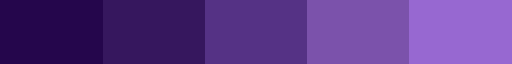

In [23]:
# Create custom palette
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
newcolors = np.array([[151, 104, 209],
[123, 82, 171],
[85, 50, 133],
[54, 23, 94],
[37, 6, 76]])/255
special_palette = ListedColormap(newcolors[::-1], name='special_palette')
special_palette

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

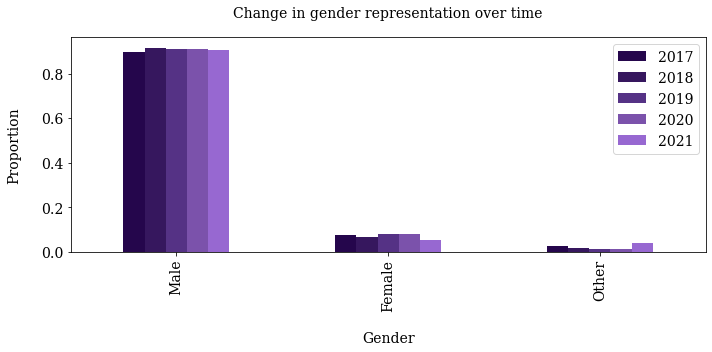

In [25]:
counts_df = counts_df.reindex(["Male", "Female", "Other"])
counts_df.plot(kind='bar', figsize = ((10,5)), colormap = special_palette);
fontsize = 14
plt.legend(labels = [2017,2018,2019,2020,2021], fontsize = fontsize)
plt.xlabel('Gender', labelpad = 20, fontsize = fontsize)
plt.ylabel('Proportion', labelpad = 20, fontsize = fontsize)
plt.xticks(fontsize = fontsize); plt.yticks(fontsize = fontsize)
plt.title('Change in gender representation over time', fontsize = fontsize, pad = 20)
plt.tight_layout()
#plt.savefig('Gender.png')
plt.show()

In [26]:
counts_df

,2017,2018,2019,2020,2021
Gender,,,,,
Male,0.896920,0.916779,0.910256,0.908405,0.906957
Female,0.077148,0.067610,0.077992,0.079335,0.052570
Other,0.025932,0.015611,0.011753,0.012260,0.040473


Remarkably, there has been almost no shift in the proportion in the "Male" category, which has stayed at almost 91% throughout.

<a name="Race"></a>
## Race/Ethnicity

In [27]:
df2017 = drop_empty_rows(all_data[0][['Race']])
df2018 = drop_empty_rows(all_data[1][['RaceEthnicity']])
df2019 = drop_empty_rows(all_data[2][['Ethnicity']])
df2020 = drop_empty_rows(all_data[3][['Ethnicity']])
df2021 = drop_empty_rows(all_data[4][['Ethnicity']])

From 51392 rows 18359 rows containing null values were dropped, leaving 33033 rows.
From 98855 rows 41382 rows containing null values were dropped, leaving 57473 rows.
From 88883 rows 12215 rows containing null values were dropped, leaving 76668 rows.
From 64461 rows 18513 rows containing null values were dropped, leaving 45948 rows.
From 83439 rows 3975 rows containing null values were dropped, leaving 79464 rows.


In [28]:
# Moving on now to look at Race/Ethnicity

In [29]:
print(get_possible_values(df2017, 'Race'))
print(get_possible_values(df2018, 'RaceEthnicity'))
print((get_possible_values(df2019, 'Ethnicity')))
print(get_possible_values(df2020, 'Ethnicity'))
print(get_possible_values(df2021, 'Ethnicity'))

{'Native American, Pacific Islander, or Indigenous Australian', 'East Asian', 'White or of European descent', 'Black or of African descent', 'Hispanic or Latino/Latina', 'South Asian', 'I don’t know', 'I prefer not to say', 'Middle Eastern'}
{'Native American, Pacific Islander, or Indigenous Australian', 'East Asian', 'White or of European descent', 'Black or of African descent', 'Hispanic or Latino/Latina', 'South Asian', 'Middle Eastern'}
{'Native American, Pacific Islander, or Indigenous Australian', 'Biracial', 'East Asian', 'Black or of African descent', 'White or of European descent', 'Hispanic or Latino/Latina', 'South Asian', 'Middle Eastern', 'Multiracial'}
{'Southeast Asian', 'Biracial', 'East Asian', 'Black or of African descent', 'White or of European descent', 'Hispanic or Latino/a/x', 'South Asian', 'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)', 'Middle Eastern', 'Multiracial'}
{'Southeast Asian', 'Biracial', 'East Asian', 'White or of

To handle this categorical variable, we note again that the possible values for this variable change each year. Only "Male" and "Female" remain the same (though in some years these are sometimes labelled "Man" and "Woman".)

Six categories have remained essentially the same throughout the years: 
East Asian
Hispanic or Latino/Latina 
South Asian
Black or of African descent
White or of European descent
Native American, Pacific Islander, or Indigenous Australian
Middle Eastern

However even with these there have been minor variations in the naming. These will need to be made consistent.

The following categories have come and gone throughout the years:
Biracial
Multiracial
Southeast Asian
I don't know
I prefer not to say
Or, in your own words:

All of these will be combined into "Other"

In [30]:
# Create an empty Other dataframe for later use
dfOther = pd.DataFrame([['RaceEthnicity', 'count'], ['Other', 0.0]])
dfOther.columns = dfOther.iloc[0] # Set first row as header
dfOther = dfOther[1:].set_index('RaceEthnicity') # Set first column as index
dfOther

,count
RaceEthnicity,
Other,0.0


### 2017

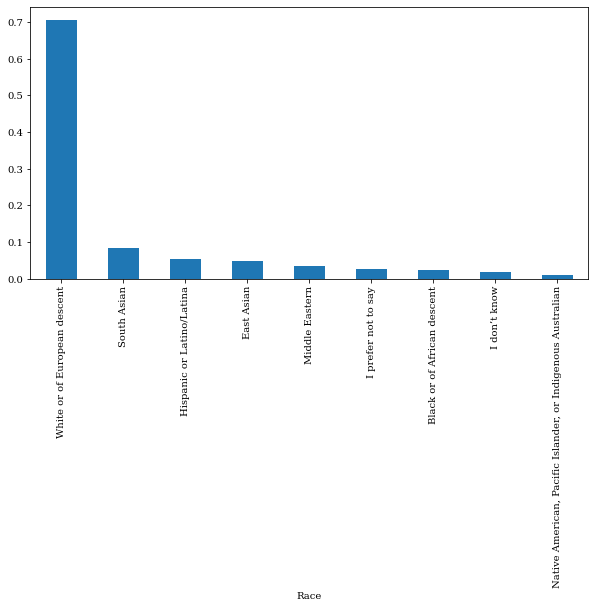

,count
Race,
Black or of African descent,0.023805
East Asian,0.046632
Hispanic or Latino/Latina,0.053446
"Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)",0.008366
Middle Eastern,0.034011
Other,0.043815
South Asian,0.083259
White or of European descent,0.706667


In [31]:
poss_vals = get_possible_values(df2017, 'Race')
props_df2017 = clean_and_plot(df2017, column_name = 'Race', possible_values = poss_vals)
props_df2017.rename({'I don’t know': 'Other', 'I prefer not to say': 'Other'}, inplace = True)
props_df2017.rename({'Native American, Pacific Islander, or Indigenous Australian' : 'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)'}, inplace = True)
props_df2017 = props_df2017.groupby(['Race'], as_index=True).agg('sum')
props_df2017

### 2018

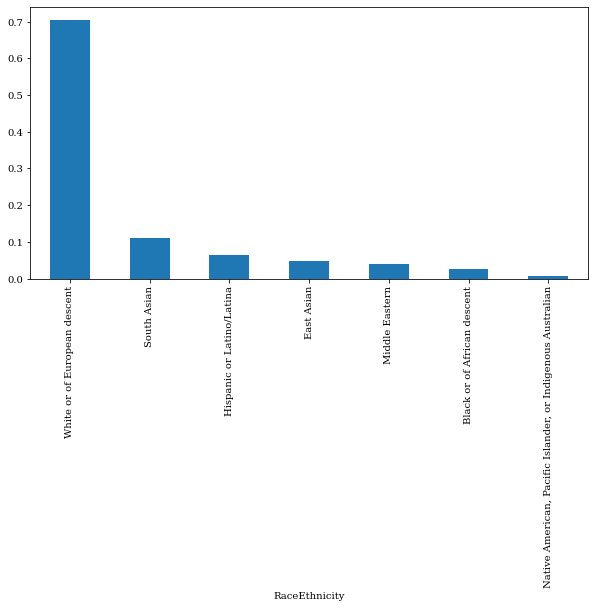

,count
RaceEthnicity,
Black or of African descent,0.026212
East Asian,0.048505
Hispanic or Latino/Latina,0.063835
"Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)",0.007359
Middle Eastern,0.039244
Other,0.000000
South Asian,0.109744
White or of European descent,0.705100


In [32]:
poss_vals = get_possible_values(df2018, 'RaceEthnicity')
props_df2018 = clean_and_plot(df2018, column_name = 'RaceEthnicity', possible_values = poss_vals)
props_df2018.rename({'Native American, Pacific Islander, or Indigenous Australian' : 'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)'}, inplace = True)
props_df2018 = pd.concat([props_df2018, dfOther]) # Add an empty Other column
props_df2018 = props_df2018.groupby(['RaceEthnicity'], as_index=True).agg('sum')
props_df2018

In [33]:
props_df2018.index == props_df2017.index # Double check that each year now has the same categories

array([ True,  True,  True,  True,  True,  True,  True,  True])

### 2019

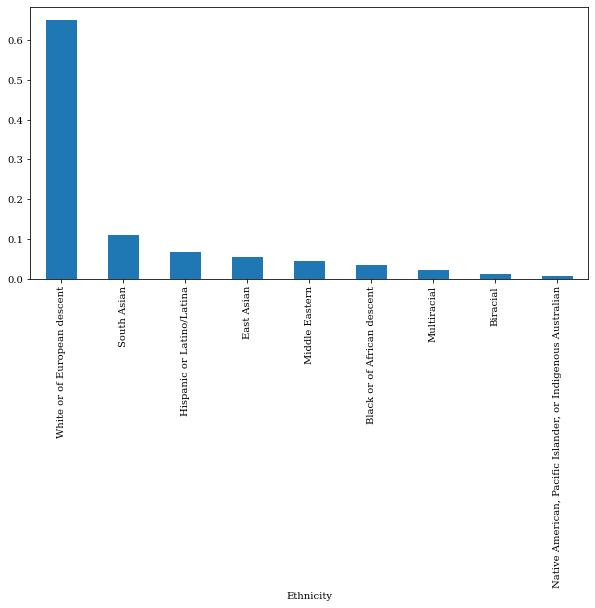

,count
Ethnicity,
Black or of African descent,0.033343
East Asian,0.053962
Hispanic or Latino/Latina,0.065713
"Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)",0.007474
Middle Eastern,0.043485
Other,0.033872
South Asian,0.109895
White or of European descent,0.652256


In [34]:
poss_vals = get_possible_values(df2019, 'Ethnicity')
props_df2019 = clean_and_plot(df2019, column_name = 'Ethnicity', possible_values = poss_vals)
props_df2019.rename({'Native American, Pacific Islander, or Indigenous Australian' : 'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)'}, inplace = True)
props_df2019.rename({'Biracial': 'Other', 'Multiracial': 'Other'}, inplace = True)
props_df2019 = props_df2019.groupby(['Ethnicity'], as_index=True).agg('sum')
props_df2019

In [35]:
props_df2019.index == props_df2018.index # Double check that each year now has the same categories

array([ True,  True,  True,  True,  True,  True,  True,  True])

### 2020

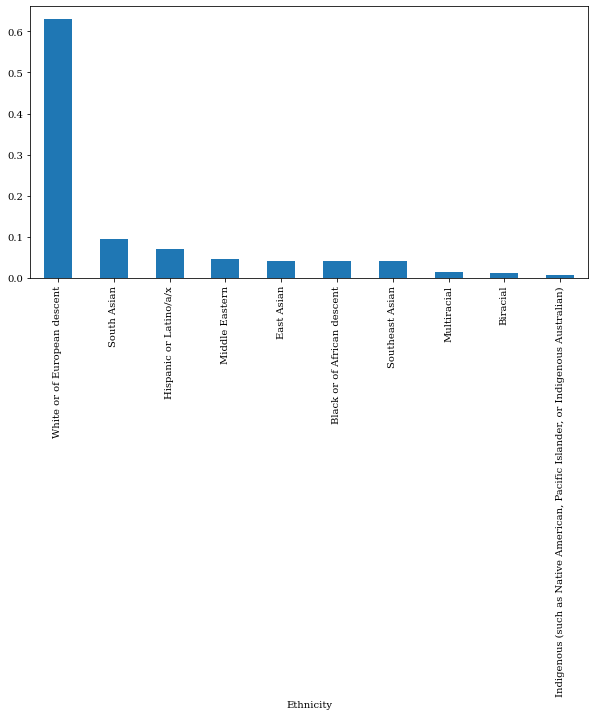

,count
Ethnicity,
Black or of African descent,0.041333
East Asian,0.042536
Hispanic or Latino/Latina,0.069838
"Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)",0.007677
Middle Eastern,0.045543
Other,0.068495
South Asian,0.095556
White or of European descent,0.629022


In [36]:
poss_vals = get_possible_values(df2020, 'Ethnicity')
props_df2020 = clean_and_plot(df2020, column_name = 'Ethnicity', possible_values = poss_vals)
props_df2020.rename({'Biracial': 'Other', 'Multiracial': 'Other', 'Southeast Asian': 'Other', 'Hispanic or Latino/a/x' : 'Hispanic or Latino/Latina'}, inplace = True)
props_df2020 = props_df2020.groupby(['Ethnicity'], as_index=True).agg('sum')
props_df2020

### 2021

In [37]:
props_df2020.index == props_df2019.index # Double check that each year now has the same categories

array([ True,  True,  True,  True,  True,  True,  True,  True])

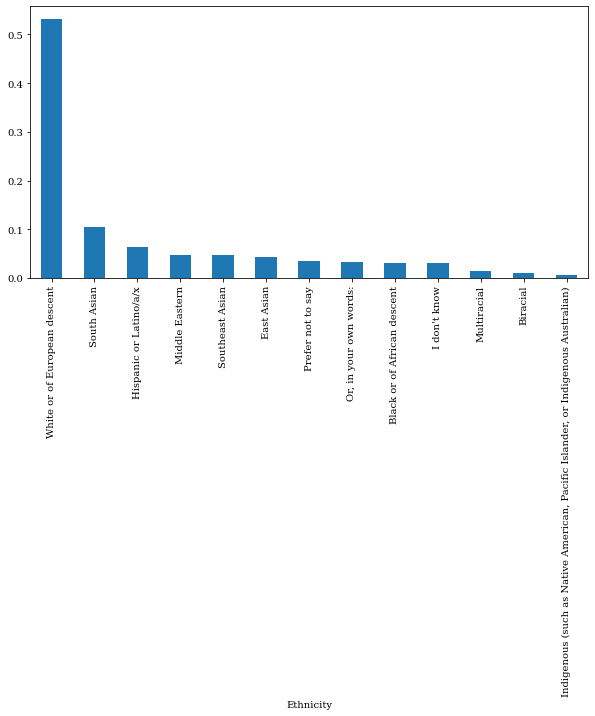

,count
Ethnicity,
Black or of African descent,0.030719
East Asian,0.042716
Hispanic or Latino/Latina,0.063703
"Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)",0.006576
Middle Eastern,0.048286
Other,0.171564
South Asian,0.105379
White or of European descent,0.531057


In [38]:
poss_vals = get_possible_values(df2021, 'Ethnicity')
props_df2021 = clean_and_plot(df2021, column_name = 'Ethnicity', possible_values = poss_vals)
props_df2021.rename({'I don\'t know': 'Other', 'Prefer not to say': 'Other', 'Or, in your own words:':'Other'}, inplace = True)
props_df2021.rename({'Biracial': 'Other', 'Multiracial': 'Other', 'Southeast Asian': 'Other', 'Hispanic or Latino/a/x' : 'Hispanic or Latino/Latina'}, inplace = True)
props_df2021 = props_df2021.groupby(['Ethnicity'], as_index=True).agg('sum')
props_df2021

In [39]:
props_df2021.index == props_df2020.index # Double check that each year now has the same categories

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [40]:
props_df2017.rename(columns={"count": "count2017"}, inplace = True)
props_df2018.rename(columns={"count": "count2018"}, inplace = True)
props_df2019.rename(columns={"count": "count2019"}, inplace = True)
props_df2020.rename(columns={"count": "count2020"}, inplace = True)
props_df2021.rename(columns={"count": "count2021"}, inplace = True)

In [41]:
counts_df = props_df2017.join(props_df2018)
counts_df = counts_df.join(props_df2019)
counts_df = counts_df.join(props_df2020)
counts_df = counts_df.join(props_df2021)

In [42]:
counts_df

,count2017,count2018,count2019,count2020,count2021
Race,,,,,
Black or of African descent,0.023805,0.026212,0.033343,0.041333,0.030719
East Asian,0.046632,0.048505,0.053962,0.042536,0.042716
Hispanic or Latino/Latina,0.053446,0.063835,0.065713,0.069838,0.063703
"Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)",0.008366,0.007359,0.007474,0.007677,0.006576
Middle Eastern,0.034011,0.039244,0.043485,0.045543,0.048286
Other,0.043815,0.000000,0.033872,0.068495,0.171564
South Asian,0.083259,0.109744,0.109895,0.095556,0.105379
White or of European descent,0.706667,0.705100,0.652256,0.629022,0.531057


### Make a publication-quality plot for Race

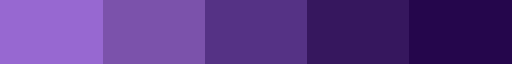

In [43]:
counts_df_to_plot = counts_df[['count2021', 'count2020', 'count2019', 'count2018', 'count2017']]
counts_df_to_plot = counts_df_to_plot.rename(columns = {'count2021':'2021', 'count2020':'2020', 'count2019':'2019', 'count2018':'2018', 'count2017':'2017'})
counts_df_to_plot.rename({'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)': 'Indigenous'}, inplace = True)
special_palette = ListedColormap(newcolors[::], name='special_palette')
special_palette # Reversing the colors because I want to present 2021 first

In [44]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

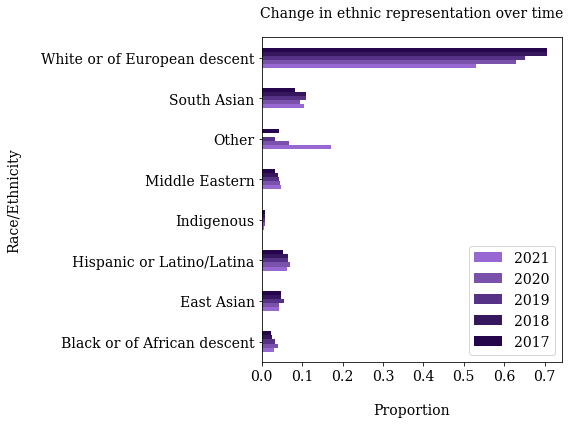

In [45]:
counts_df_to_plot.plot(kind='barh', figsize = ((8,6)), colormap = special_palette);
fontsize = 14
plt.legend(fontsize = fontsize)
plt.ylabel('Race/Ethnicity', labelpad = 20, fontsize = fontsize)
plt.xlabel('Proportion', labelpad = 20, fontsize = fontsize)
plt.yticks(fontsize = fontsize, rotation = 0)
plt.xticks(fontsize = fontsize, rotation = 0)
plt.title('Change in ethnic representation over time', fontsize = fontsize, pad = 20)
plt.tight_layout()
#plt.savefig('Race-Ethnicity2.png')
plt.show()

<a name="PopularProgrammingLanguages"></a>

<a name="PopularProgrammingLanguages"></a>

<a name="PopularProgrammingLanguages"></a>
## Popular Programming Languages

Lastly we look at what programming languages were most popular over the years.

In [46]:
# Subset the data to only the columns we are analysing
df2017 = drop_empty_rows(all_data[0][['WantWorkLanguage']])
df2018 = drop_empty_rows(all_data[1][['LanguageDesireNextYear']])
df2019 = drop_empty_rows(all_data[2][['LanguageDesireNextYear']])
df2020 = drop_empty_rows(all_data[3][['LanguageDesireNextYear']])
df2021 = drop_empty_rows(all_data[4][['LanguageWantToWorkWith']])

From 51392 rows 17621 rows containing null values were dropped, leaving 33771 rows.
From 98855 rows 25611 rows containing null values were dropped, leaving 73244 rows.
From 88883 rows 4795 rows containing null values were dropped, leaving 84088 rows.
From 64461 rows 10348 rows containing null values were dropped, leaving 54113 rows.
From 83439 rows 6618 rows containing null values were dropped, leaving 76821 rows.


In [47]:
# Look at each year individually, and then combine.

### 2017

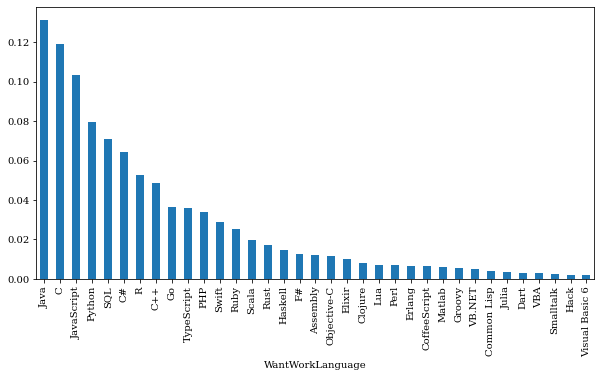

In [48]:
possible_values = get_possible_values(df2017, 'WantWorkLanguage')
props_df2017 = clean_and_plot(df2017, column_name = 'WantWorkLanguage', possible_values = possible_values)

### 2018

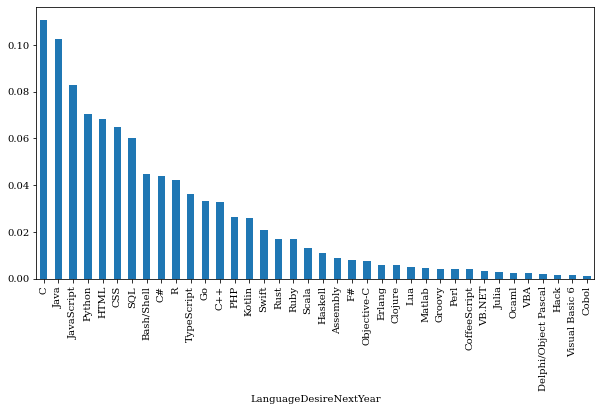

In [49]:
possible_values = get_possible_values(df2018, 'LanguageDesireNextYear')
props_df2018 = clean_and_plot(df2018, column_name = 'LanguageDesireNextYear', possible_values = possible_values)

### 2019

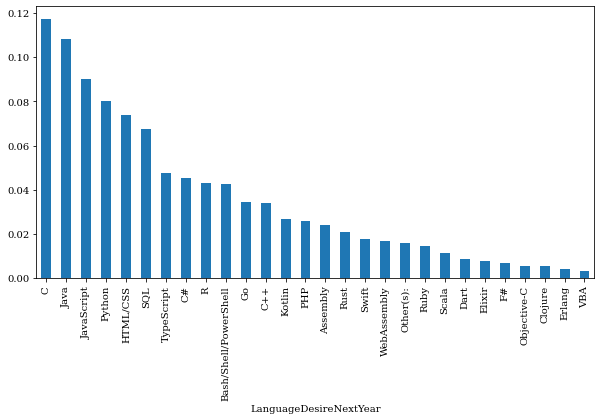

In [50]:
possible_values = get_possible_values(df2019, 'LanguageDesireNextYear')
props_df2019 = clean_and_plot(df2019, column_name = 'LanguageDesireNextYear', possible_values = possible_values)

### 2020

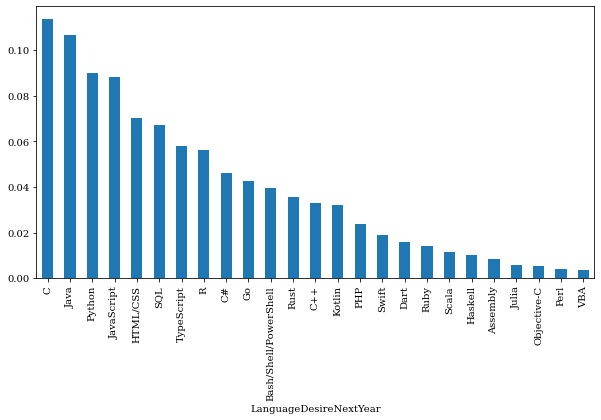

In [51]:
possible_values = get_possible_values(df2020, 'LanguageDesireNextYear')
props_df2020 = clean_and_plot(df2020, column_name = 'LanguageDesireNextYear', possible_values = possible_values)

## 2021

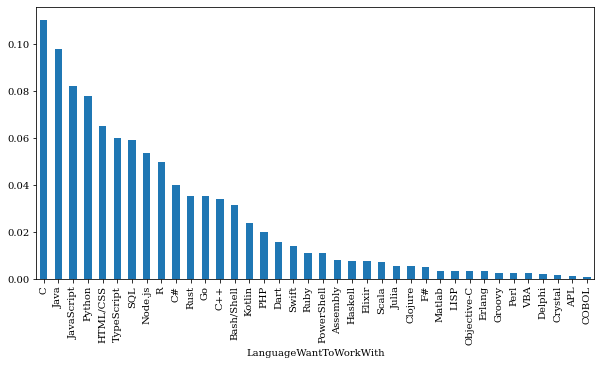

In [52]:
possible_values = get_possible_values(df2021, 'LanguageWantToWorkWith')
props_df2021 = clean_and_plot(df2021, column_name = 'LanguageWantToWorkWith', possible_values = possible_values)

In [53]:
props_df2017.rename(columns={"count": "2017"}, inplace = True)
props_df2018.rename(columns={"count": "2018"}, inplace = True)
props_df2019.rename(columns={"count": "2019"}, inplace = True)
props_df2020.rename(columns={"count": "2020"}, inplace = True)
props_df2021.rename(columns={"count": "2021"}, inplace = True)

In [54]:
language_counts = props_df2017.join(props_df2018)
language_counts = language_counts.join(props_df2019)
language_counts = language_counts.join(props_df2020)
language_counts = language_counts.join(props_df2021)

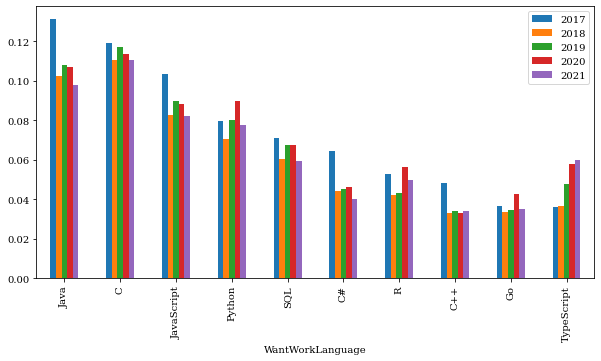

In [55]:
language_counts.head(10).plot(kind='bar', figsize = ((10,5)));

### Make a publication-quality plot for popular programming languages

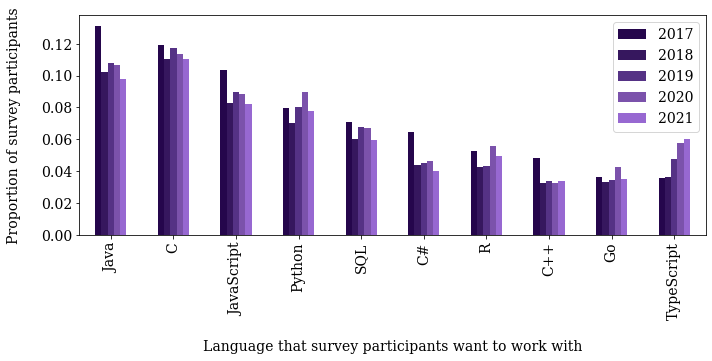

In [56]:
special_palette = ListedColormap(newcolors[::-1], name='special_palette')
language_counts.sort_values(by = '2017', axis=0, ascending = False).head(10).plot(kind='bar', figsize = ((10,5)), colormap = special_palette);
fontsize = 14
plt.xlabel('Language that survey participants want to work with', labelpad = 20, fontsize = fontsize)
plt.ylabel('Proportion of survey participants', labelpad = 20, fontsize = fontsize)
#plt.title('Popular programming languages', fontsize = fontsize)
plt.xticks(fontsize = fontsize); plt.yticks(fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.tight_layout()
plt.savefig('Languages.png')
plt.show()

### Make a "Top 10" table for blogpost

In [57]:
languages2017 = language_counts.sort_values(by = '2017', ascending = False)
top10_in_2017 = languages2017.head(10).index
languages2021 = language_counts.sort_values(by = '2021', ascending = False)
top10_in_2021 = languages2021.head(10).index
data = np.array([top10_in_2017.values, top10_in_2021.values]).transpose()
df = pd.DataFrame(data, columns = ['2017', '2021'], index = np.arange(1, 11, 1))
df

,2017,2021
1,Java,C
2,C,Java
3,JavaScript,JavaScript
4,Python,Python
5,SQL,TypeScript
6,C#,SQL
7,R,R
8,C++,C#
9,Go,Rust
10,TypeScript,Go
